# NEW part


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
path_to_data = r"dataset\\"

In [7]:
# dataset directories
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [8]:
# printing 
img_dirs

['dataset\\\\Asaduzzaman Noor',
 'dataset\\\\Ayman Sadiq',
 'dataset\\\\Bangabandhu Sheikh Mujibur Rahman',
 'dataset\\\\Humayun Ahmed',
 'dataset\\\\Jamilur Reza Chowdhury',
 'dataset\\\\Momtaz',
 'dataset\\\\muhammad zafar iqbal',
 'dataset\\\\Runa Laila',
 'dataset\\\\Senjuti Saha',
 'dataset\\\\Shahidul Alam',
 'dataset\\\\Shakib Al Hasan',
 'dataset\\\\Sheikh Hasina',
 'dataset\\\\Tahsan Khan',
 'dataset\\\\Wasfia Nazreen']

In [9]:
# build the dictonary twice in case of delteing something manually after cropping

celebrity_file_names_dict = {}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list

In [10]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count +=1
class_dict

{'Asaduzzaman Noor': 0,
 'Ayman Sadiq': 1,
 'Bangabandhu Sheikh Mujibur Rahman': 2,
 'Humayun Ahmed': 3,
 'Jamilur Reza Chowdhury': 4,
 'Momtaz': 5,
 'muhammad zafar iqbal': 6,
 'Runa Laila': 7,
 'Senjuti Saha': 8,
 'Shahidul Alam': 9,
 'Shakib Al Hasan': 10,
 'Sheikh Hasina': 11,
 'Tahsan Khan': 12,
 'Wasfia Nazreen': 13}

In [11]:
#Printing
celebrity_file_names_dict

{'Asaduzzaman Noor': ['dataset\\\\Asaduzzaman Noor\\1.jpg',
  'dataset\\\\Asaduzzaman Noor\\10.jpg',
  'dataset\\\\Asaduzzaman Noor\\10_rotated_0_zoom_0.jpg',
  'dataset\\\\Asaduzzaman Noor\\10_rotated_0_zoom_1.jpg',
  'dataset\\\\Asaduzzaman Noor\\10_rotated_0_zoom_2.jpg',
  'dataset\\\\Asaduzzaman Noor\\10_rotated_0_zoom_3.jpg',
  'dataset\\\\Asaduzzaman Noor\\10_rotated_1_zoom_0.jpg',
  'dataset\\\\Asaduzzaman Noor\\10_rotated_1_zoom_1.jpg',
  'dataset\\\\Asaduzzaman Noor\\10_rotated_1_zoom_2.jpg',
  'dataset\\\\Asaduzzaman Noor\\10_rotated_1_zoom_3.jpg',
  'dataset\\\\Asaduzzaman Noor\\10_rotated_2_zoom_0.jpg',
  'dataset\\\\Asaduzzaman Noor\\10_rotated_2_zoom_1.jpg',
  'dataset\\\\Asaduzzaman Noor\\10_rotated_2_zoom_2.jpg',
  'dataset\\\\Asaduzzaman Noor\\10_rotated_2_zoom_3.jpg',
  'dataset\\\\Asaduzzaman Noor\\10_rotated_3_zoom_0.jpg',
  'dataset\\\\Asaduzzaman Noor\\10_rotated_3_zoom_1.jpg',
  'dataset\\\\Asaduzzaman Noor\\10_rotated_3_zoom_2.jpg',
  'dataset\\\\Asaduzzaman Noo

In [12]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is not None:
            scalled_raw_img = cv2.resize(img,(180,180))
            X.append(scalled_raw_img)
            y.append(class_dict[celebrity_name])

In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [12]:
del X_train,  X_test, y


NameError: name 'ConfusionMatrixDisplay' is not defined

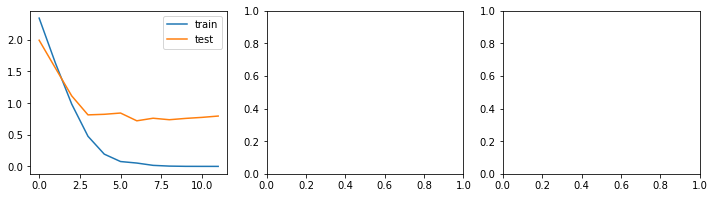

In [32]:
##DONT do anything. I'll modify. DONT RUN THIS SNIPPET

y_logits = model.predict(X_test_scaled)
y_pred = tf.keras.activations.softmax(tf.constant(y_logits)).numpy()
y_true = np.array(y_test)
f, ax = plt.subplots(ncols=3, figsize=(12,3))
aucs=dict(cnn=dict(random=[],imagenet=[]))

ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='test')
# ax[0].set(yscale='log', xlim=[10, ax[0].get_xlim()[1]], ylim=[ax[0].get_ylim()[0], history.history['val_loss'][9] * 1.1])
ax[0].legend()

cm = ConfusionMatrixDisplay.from_predictions(y_true, y_pred.argmax(axis=1), normalize='true', include_values=False, cmap='Blues', colorbar=True, ax=ax[1])

for i in range(y_logits.shape[1]):
  fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
  auc = roc_auc_score(y_true == i, y_pred[:, i])
  ax[2].plot(fpr, tpr, label='%d (%.2f)' % (i, auc))
  aucs['cnn']['random'].append(auc)
ax[2].legend()

_ = ax[1].set_title('CNN classifier', fontdict=dict(fontsize=18))

In [33]:
num_classes = 14

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)]              
history=model.fit(X_train_scaled, y_train,batch_size=64,callbacks=callbacks, validation_split=0.2,epochs=30)

Epoch 1/30
85/85 [==============================] - 121s 1s/step - loss: 2.4035 - accuracy: 0.1984 - val_loss: 1.9945 - val_accuracy: 0.3456
Epoch 2/30
85/85 [==============================] - 103s 1s/step - loss: 1.6556 - accuracy: 0.4649 - val_loss: 1.5317 - val_accuracy: 0.4926
Epoch 3/30
85/85 [==============================] - 98s 1s/step - loss: 1.0649 - accuracy: 0.6635 - val_loss: 1.1951 - val_accuracy: 0.6263
Epoch 4/30
85/85 [==============================] - 99s 1s/step - loss: 0.5530 - accuracy: 0.8254 - val_loss: 1.1738 - val_accuracy: 0.6374
Epoch 5/30
85/85 [==============================] - 101s 1s/step - loss: 0.2667 - accuracy: 0.9233 - val_loss: 0.8837 - val_accuracy: 0.7356
Epoch 6/30
85/85 [==============================] - 113s 1s/step - loss: 0.1326 - accuracy: 0.9666 - val_loss: 0.8293 - val_accuracy: 0.7533
Epoch 7/30
85/85 [==============================] - 124s 1s/step - loss: 0.0913 - accuracy: 0.9751 - val_loss: 0.8307 - val_accuracy: 0.7703
Epoch 8/30
85/8

In [34]:
model.evaluate(X_test_scaled,y_test)

71/71 [==============================] - 12s 172ms/step - loss: 0.7454 - accuracy: 0.8311


[0.7454026937484741, 0.8311170339584351]

In [35]:
predictions = model.predict(X_test_scaled)
predictions

array([[ 17.573872 ,   1.2363644, -11.06715  , ...,   2.8028011,
         -1.2024701, -32.8026   ],
       [ 23.662933 ,   2.2745938,  -9.234335 , ...,   3.134705 ,
         -6.93162  , -39.41657  ],
       [  4.4307523,   5.8526855,  -6.505753 , ...,   3.7615223,
         -4.0742683, -23.158733 ],
       ...,
       [ 21.183367 ,   4.972398 , -14.464287 , ...,  -3.789836 ,
          1.7685803, -31.884043 ],
       [  6.982782 ,  16.540194 , -29.518572 , ...,   6.8492646,
          3.3624406, -53.955982 ],
       [  4.244682 ,  -3.0483813,  -5.633629 , ...,   6.7967405,
          3.2744796, -20.106827 ]], dtype=float32)

In [36]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

In [ ]:
y_test[0]

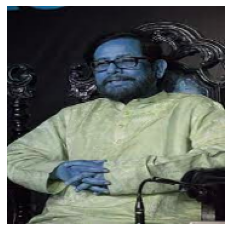

In [37]:
plt.axis('off')
plt.imshow(X[0])

In [38]:
model.evaluate(X_test_scaled,y_test)

71/71 [==============================] - 12s 174ms/step - loss: 0.7454 - accuracy: 0.8311


[0.7454026937484741, 0.8311170339584351]

In [41]:
# import the class dictonray as json file
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [42]:
model.save('model.h5')

In [43]:
from tensorflow.keras.models import load_model

In [44]:
model = load_model('model.h5')

In [47]:
img = cv2.imread('dataset\\\\Senjuti Saha\\25_rotated_0_zoom_0.jpg')
X = []
if img is not None:
    scalled_raw_img = cv2.resize(img,(180,180))
    X.append(scalled_raw_img)
X = np.array(X)
X = X/255

In [48]:
y = model.predict(X)

In [49]:
np.argmax(y)

8

In [50]:
if np.argmax(y)==0:
    print('Asaduzzaman Noor')
elif np.argmax(y)==1:
    print('Ayman Sadiq')
elif np.argmax(y)==2:
    print('Bangabandhu Sheikh Mujibur Rahman')
elif np.argmax(y)==3:
    print('Humayun Ahmed')
elif np.argmax(y)==4:
    print('Jamilur Reza Chowdhury')
elif np.argmax(y)==5:
    print('Momtaz')
elif np.argmax(y)==6:
    print('Muhammad Zafar Iqbal')
elif np.argmax(y)==7:
    print('Runa Laila')
elif np.argmax(y)==8:
    print('Senjuti Saha')
elif np.argmax(y)==9:
    print('Shahidul Alam')
elif np.argmax(y)==10:
    print('Shakib Al Hasan')
elif np.argmax(y)==11:
    print('Sheikh Hasina')
elif np.argmax(y)==12:
    print('Tahsan Khan')    
elif np.argmax(y)==13:
    print('Wasfia Nazreen')

Senjuti Saha


In [ ]:
y_logits = model.predict(X_test_scaled)
y_pred = tf.keras.activations.softmax(tf.constant(y_logits)).numpy()
y_true = np.array(y_test)
f, ax = plt.subplots(ncols=3, figsize=(12,3))
aucs=dict(cnn=dict(random=[],imagenet=[]))

ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='test')
# ax[0].set(yscale='log', xlim=[10, ax[0].get_xlim()[1]], ylim=[ax[0].get_ylim()[0], history.history['val_loss'][9] * 1.1])
ax[0].legend()

cm = ConfusionMatrixDisplay.from_predictions(y_true, y_pred.argmax(axis=1), normalize='true', include_values=False, cmap='Blues', colorbar=True, ax=ax[1])

for i in range(y_logits.shape[1]):
  fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
  auc = roc_auc_score(y_true == i, y_pred[:, i])
  ax[2].plot(fpr, tpr, label='%d (%.2f)' % (i, auc))
  aucs['cnn']['random'].append(auc)
ax[2].legend()

_ = ax[1].set_title('CNN classifier', fontdict=dict(fontsize=18))